In [223]:
from datamarket import *

# Read the data and train model without augmentation
We first use factorized linear regression, then automl.

In summary, R2 score for linear regression is:0.009878592245889273, for automl is: 0.5458767724247864

In [104]:
# read gender from 
gender = pd.read_csv("gender.csv")

# train test split
msk = split_mask(len(gender)) < 0.8
gender_train = gender[msk].copy()
gender_test = gender[~msk].copy()

In [236]:
gender_train_data = agg_dataset()
gender_train_data.load(gender_train, ["Number Tested", "Mean Scale Score"], ["DBN", ["DBN","Grade"], "Year", "Category"], "gender")
gender_train_data.process_target("Mean Scale Score")
gender_train_data.to_numeric_and_impute_all()
gender_train_data.remove_redundant_columns()
gender_train_data.compute_agg()

gender_test_data = agg_dataset()
gender_test_data.load(gender_test, ["Number Tested", "Mean Scale Score"], ["DBN", ["DBN","Grade"], "Year", "Category"], "gender")
gender_test_data.process_target("Mean Scale Score")
gender_test_data.to_numeric_and_impute_all()
gender_test_data.remove_redundant_columns()
gender_test_data.compute_agg()

In [96]:
# model performance before augmentation with linear regression
train_cov = gender_train_data.covariance
test_cov = gender_test_data.covariance
x = ['gender:Number Tested']
y = 'gender:Mean Scale Score'
parameter = linear_regression(train_cov, x, y)
print("R2 score is:" + str(r2(test_cov, x, y, parameter)))

R2 score is:0.009878592245889273


In [114]:
gender = gender.astype({'DBN': 'category', 'Year': 'category', "Grade": 'category', "Category": 'category'})
gender["Mean Scale Score"] = pd.to_numeric(gender["Mean Scale Score"], errors='coerce')
gender.dropna(subset=["Mean Scale Score"],inplace=True)
msk = split_mask(len(gender)) < 0.8
gender_train = gender[msk].copy()
gender_test = gender[~msk].copy()

In [122]:
# model performance with autoML 
X_train = gender_train[["Number Tested", "DBN", "Year", "Grade"]]
y_train = gender_train["Mean Scale Score"]
X_test = gender_test[["Number Tested", "DBN", "Year", "Grade"]]
y_test = gender_test["Mean Scale Score"]

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=180,
    per_run_time_limit=90
)
automl.fit(X_train, y_train, X_test, y_test, dataset_name='gender')

[WARNING] [2022-03-10 22:13:14,023:Client-AutoML(1):gender] Capping the per_run_time_limit to 89.0 to have time for a least 2 models in each process.
[WARNING] [2022-03-10 22:13:35,660:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2022-03-10 22:14:04,725:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2022-03-10 22:15:34,842:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


AutoSklearnRegressor(per_run_time_limit=90, time_left_for_this_task=180)

Train R2 score: 0.6760717762409097
Test R2 score: 0.5458767724247864
          rank  ensemble_weight               type      cost   duration
model_id                                                               
5            1              1.0  gradient_boosting  0.464419  22.770549
                   Timestamp  ensemble_optimization_score  \
2 2022-03-10 22:13:35.000000                          NaN   
0 2022-03-10 22:13:35.715064                    -0.000025   
3 2022-03-10 22:15:57.000000                    -0.000025   
1 2022-03-10 22:15:57.711512                     0.535581   

   ensemble_test_score  single_best_optimization_score  \
2                  NaN                       -0.065672   
0            -0.000010                       -0.065672   
3            -0.000010                        0.535581   
1             0.545877                        0.535581   

   single_best_train_score  single_best_test_score  
2                 0.293797               -0.055145  
0           

<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

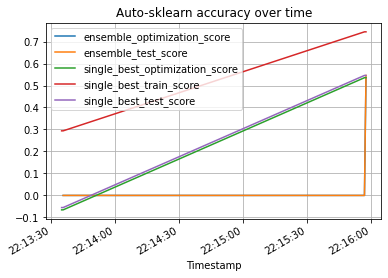

In [125]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.leaderboard())
poT = automl.performance_over_time_
print(poT)
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

# Load seller datasets and build market
Currently, we need to specify the join attributes (could be joined on multiple attributes) and these attributes name have to be same across two tables.

We need more data.

The best data increase linear regression R2 to 0.3944023420421897

This data also increase automl R2 to: 0.7970338954417067

In [152]:
# read buyer dataste
crime = pd.read_csv("crime.csv")
crimedata = agg_dataset()
crimedata.load(crime, [], ["DBN"], "crime")
crimedata.find_features()
crimedata.remove_redundant_columns()
crimedata.compute_agg(True)


esl = pd.read_csv("esl.csv")
esldata = agg_dataset()
esldata.load(esl, [], [["DBN","Grade"]], "esl")
esldata.find_features()
esldata.remove_redundant_columns()
esldata.compute_agg(True)

ap = pd.read_csv("ap.csv")
apdata = agg_dataset()
apdata.load(ap, [], ["DBN"], "ap")
apdata.find_features()
apdata.remove_redundant_columns()
apdata.compute_agg(True)

survey = pd.read_csv("2013_NYC_School_Survey.csv")
surveydata = agg_dataset()
surveydata.load(survey, [], ["DBN"], "survey")
surveydata.find_features()
surveydata.remove_redundant_columns()
surveydata.compute_agg(True)

base = pd.read_csv("base.csv")
basedata = agg_dataset()
basedata.load(base, [], ["DBN"], "base")
basedata.find_features()
basedata.remove_redundant_columns()
basedata.compute_agg(True)

disc = pd.read_csv("disc.csv")
discdata = agg_dataset()
discdata.load(disc, [], ["DBN"], "disc")
discdata.find_features()
discdata.remove_redundant_columns()
discdata.compute_agg(True)

math = pd.read_csv("math.csv")
mathdata = agg_dataset()
mathdata.load(math, [], [["DBN","Grade"]], "math")
mathdata.find_features()
mathdata.remove_redundant_columns()
mathdata.compute_agg(True)

oss = pd.read_csv("oss.csv")
ossdata = agg_dataset()
ossdata.load(oss, [], ["DBN"], "oss")
ossdata.find_features()
ossdata.remove_redundant_columns()
ossdata.compute_agg(True)

pe = pd.read_csv("pe.csv")
pedata = agg_dataset()
pedata.load(pe, [], ["DBN"], "pe")
pedata.find_features()
pedata.remove_redundant_columns()
pedata.compute_agg(True)

s2tr = pd.read_csv("s2tr.csv")
s2trdata = agg_dataset()
s2trdata.load(s2tr, [], ["DBN"], "s2tr")
s2trdata.find_features()
s2trdata.remove_redundant_columns()
s2trdata.compute_agg(True)

sat = pd.read_csv("sat.csv")
satdata = agg_dataset()
satdata.load(sat, [], ["DBN"], "sat")
satdata.find_features()
satdata.remove_redundant_columns()
satdata.compute_agg(True)

pro = pd.read_csv("Schools_Progress_Report_2012-2013.csv")
prodata = agg_dataset()
prodata.load(pro, [], ["DBN"], "pro")
prodata.find_features()
prodata.remove_redundant_columns()
prodata.compute_agg(True)


spy = pd.read_csv("spy.csv")
spydata = agg_dataset()
spydata.load(spy, [], ["Year"], "spy")
spydata.find_features()
spydata.remove_redundant_columns()
spydata.compute_agg(True)

transfer = pd.read_csv("transfer.csv")
transferdata = agg_dataset()
transferdata.load(transfer, [], ["DBN"], "transfer")
transferdata.find_features()
transferdata.remove_redundant_columns()
transferdata.compute_agg(True)

yabc = pd.read_csv("yabc.csv")
yabcdata = agg_dataset()
yabcdata.load(yabc, [], ["DBN"], "yabc")
yabcdata.find_features()
yabcdata.remove_redundant_columns()
yabcdata.compute_agg(True)

dm1 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.22rr-ujq3")
dm1data = agg_dataset()
dm1data.load(dm1, [], ["DBN"], "dm1")
dm1data.find_features()
dm1data.remove_redundant_columns()
dm1data.compute_agg(True)

dm2 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.25aa-q86c")
dm2data = agg_dataset()
dm2data.load(dm2, [], ["DBN"], "dm2")
dm2data.find_features()
dm2data.remove_redundant_columns()
dm2data.compute_agg(True)

dm3 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29bv-qqsy")
dm3data = agg_dataset()
dm3data.load(dm3, [], ["DBN"], "dm3")
dm3data.find_features()
dm3data.remove_redundant_columns()
dm3data.compute_agg(True)

dm4 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29ry-u5bf")
dm4data = agg_dataset()
dm4data.load(dm4, [], ["DBN"], "dm4")
dm4data.find_features()
dm4data.remove_redundant_columns()
dm4data.compute_agg(True)

dm5 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.43qc-8vv8")
dm5data = agg_dataset()
dm5data.load(dm5, [], [["DBN","Grade"]], "dm5")
dm5data.find_features()
dm5data.remove_redundant_columns()
dm5data.compute_agg(True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:165: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [216]:
%%time
sellers = [(crimedata, "DBN"), (apdata, "DBN"), (surveydata, "DBN"), 
           (basedata, "DBN"), (discdata, "DBN"), (mathdata, ("DBN","Grade")), 
           (ossdata, "DBN"), (pedata, "DBN"), (s2trdata, "DBN"), 
           (satdata, "DBN"), (prodata, "DBN"), (spydata, "Year"),
           (transferdata, "DBN"), (yabcdata, "DBN"), (dm1data, "DBN"),
           (dm2data, "DBN"), (dm3data, "DBN"), (dm4data, "DBN"), (dm5data, ("DBN","Grade"))]

# find m best datasets to augment
bought = set()
m = 1
y = "Mean Scale Score"

for i in range(m):
    best_seller = None
    best_seller_attrs = []
    best_dimension = None
    best_r2 = 0

    for sellerdata, dimension in sellers:
        # check if current seller has been bought
        if sellerdata.name in bought:
            continue
        print(sellerdata.name)

        # find the attributes and r2 of augmenting
        cur_atts, final_r2 = select_features(gender_train_data, gender_test_data, sellerdata, dimension, 4, y)
#         cur_atts, final_r2 = select_features(gender_train, gender_test, sellerdata, dimension,10)

        if final_r2 > best_r2:
            best_seller = sellerdata
            best_dimension = dimension
            best_seller_attrs = cur_atts
            best_r2 = final_r2


    print(best_seller.name, best_seller_attrs, best_r2)
    
    # absorb the best seller
#     gender_train_data.absorb(best_seller, best_dimension, [x for x in best_seller_attrs if x in best_seller.X])
#     gender_test_data.absorb(best_seller, best_dimension, [x for x in best_seller_attrs if x in best_seller.X])
#     bought.add(best_seller)

crime
ap
survey
base
disc
math


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:298: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


oss
pe
s2tr
sat
pro
spy
transfer
yabc
dm1
dm2
dm3
dm4
dm5
math ['math:Level 4 %', 'math:Level 1 %', 'math:Year', 'math:Mean Scale Score'] 0.3944023420421897
CPU times: user 1.65 s, sys: 6.79 ms, total: 1.65 s
Wall time: 1.62 s


In [237]:
# make best_dimension a list
if isinstance(best_dimension, tuple):
    best_dimension = list(best_dimension)
else:
    best_dimension = [best_dimension]

# extract needed attributes
seller_features = ['cov:s:' +  attr for attr in best_seller_attrs  if attr.startswith(best_seller.name)]
buyer_features = ['cov:s:' +  attr for attr in best_seller_attrs  if not attr.startswith(best_seller.name)]
target = ['cov:s:gender:' + y]
buyer_train_data = gender_train_data.data[gender_train_data.dedup_dimensions + buyer_features + target]
buyer_test_data = gender_test_data.data[gender_train_data.dedup_dimensions + buyer_features + target]
seller_data = best_seller.data[best_dimension + seller_features]

# join buyer and seller
join_train = pd.merge(buyer_train_data,seller_data,how='left', on=best_dimension)
join_test = pd.merge(buyer_test_data,seller_data,how='left', on=best_dimension)

In [240]:
join_train = join_train.astype({'DBN': 'category', 'Year': 'category', "Grade": 'category', "Category": 'category'})
join_test = join_test.astype({'DBN': 'category', 'Year': 'category', "Grade": 'category', "Category": 'category'})

In [241]:
%%time
# model performance with autoML 
X_train = join_train[gender_train_data.dedup_dimensions + seller_features + buyer_features]
y_train = join_train[target]
X_test = join_test[gender_train_data.dedup_dimensions + seller_features + buyer_features]
y_test = join_test[target]

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=600,
    per_run_time_limit=300
)
automl.fit(X_train, y_train, X_test, y_test, dataset_name='gender')

[WARNING] [2022-03-11 00:08:46,297:Client-AutoML(1):gender] Capping the per_run_time_limit to 299.0 to have time for a least 2 models in each process.
CPU times: user 794 ms, sys: 375 ms, total: 1.17 s
Wall time: 10min 4s


AutoSklearnRegressor(per_run_time_limit=300, time_left_for_this_task=600)

Train R2 score: 0.8417184044415904
Test R2 score: 0.7970338954417067
          rank  ensemble_weight               type      cost   duration
model_id                                                               
4            1              1.0  gradient_boosting  0.181931  175.89374
                   Timestamp  ensemble_optimization_score  \
0 2022-03-11 00:09:47.064354                    -0.000038   
2 2022-03-11 00:17:43.000000                    -0.000038   
1 2022-03-11 00:17:43.318110                     0.818069   

   ensemble_test_score  single_best_optimization_score  \
0            -0.000036                             NaN   
2            -0.000036                        0.818069   
1             0.797034                        0.818069   

   single_best_train_score  single_best_test_score  
0                      NaN                     NaN  
2                 0.853446                0.797034  
1                 0.853446                0.797034  


<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

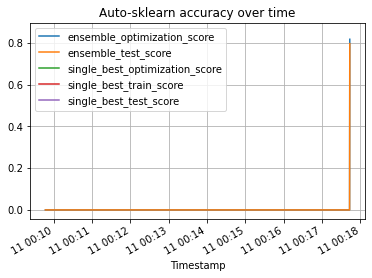

In [242]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.leaderboard())
poT = automl.performance_over_time_
print(poT)
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)